**сеть Хопфилда: ассоциативная память**

Евгений Борисов <esborisov@sevsu.ru>

##  загружаем данные 

In [1]:
# !ls data

In [2]:
import pickle
import gzip

# with gzip.open('data/numb-30x30.pkl.gz','rb') as f: data = pickle.load(f)
with gzip.open('data/pix-17x31.pkl.gz','rb') as f: data = pickle.load(f)

In [3]:
data_train = data['train']['data']
data_test = data['test']['data']
#data_test = data['test']['noise_lo']['data']

del data

In [4]:
import matplotlib.pyplot as plt

def plot_images(data,figsize=(10,4)):
    fig, ax = plt.subplots(1,len(data), figsize=figsize)
    for i in range(len(data)): 
        ax[i].axis('off')
        ax[i].imshow(data[i]) #,cmap='GnBu')

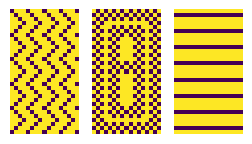

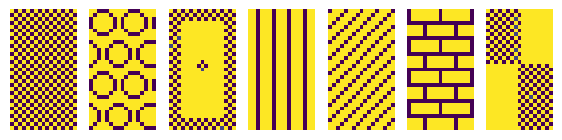

In [5]:
plot_images(data_train,(len(data_train),2))
plot_images(data_test, (len(data_test), 2))

## формируем датасет

In [6]:
import numpy as np

In [7]:
n,w,h = data_train.shape
x_train = np.sign( 254.-data_train ).reshape(n,w*h)

n,w,h = data_test.shape
x_test = np.sign( 254.-data_test ).reshape(n,w*h)

display(( x_train.shape, x_test.shape ))

((3, 527), (7, 527))

# модель

![hopfield](http://mechanoid.su/content/neural-net-hopfield-associative-memory.html/hopfield.bmp)

In [8]:
class HophieldNet:
    
    def __init__(self):
        self._weight = 0.
        self._bias = 0.
        
    def fit(self,x):
        assert len(x)>1
        batch_size, data_size = x.shape
        self._weight = x.T.dot(x)
        self._bias = x.sum(axis=0)
        # обнуляем главную диагональ матрицы весов
        # т.е. удаляем обратную связь нейрона на самого себя 
        self._weight = self._weight *(np.ones([data_size,data_size])-np.eye(data_size,data_size))
        return self
    
    def forward(self,x,max_iter=8):
        o = x
        for n in range(max_iter):
            o_ = o.copy() # сохраняем состояние
            o = self._forward_step(o) # переходим в новое состояние
            # если состояние не изменилось то завершаем
            if np.all(o==o_): break
        return n,o        
    
    def _forward_step(self,x):
        return np.sign( x.dot(self._weight) - self._bias )
    

# загружаем память модели

In [9]:
model = HophieldNet().fit(x_train)

# тестируем

In [10]:
n,o = model.forward(x_test)
display(n)

2

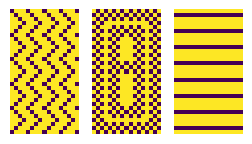

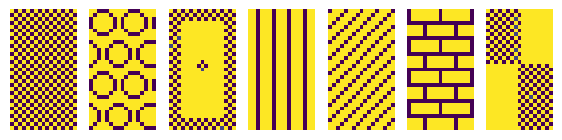

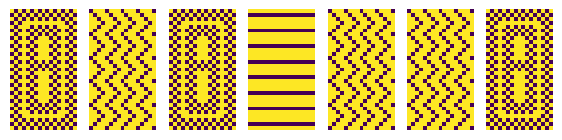

In [11]:
plot_images(data_train,(len(data_train),2))
plot_images(data_test, (len(data_test), 2))
p = (1-o.reshape(data_test.shape))*127
plot_images(p,(len(data_test),2))